In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
# 1. Dataset 
data = pd.read_csv("C:\\Users\\janin\\Downloads\\breast-cancer.csv")

# Separar variables: diagnosis es la etiqueta
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Convertir M/B a 1/0
y = y.map({"M": 1, "B": 0})

print("Dimensiones:", X.shape)
print("Clases:", y.unique())

Dimensiones: (569, 31)
Clases: [1 0]


In [6]:
# 2. División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
# 3. Pipeline con escalado
pipe = Pipeline([("scaler", StandardScaler()), ("svc", SVC(probability=True))])
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [8]:
# 4. Evaluación inicial
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
# 5. Optimización hiperparámetros
param_grid = {"svc__C":[0.1,1,10,100], "svc__gamma":["scale",0.01,0.1,1]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring="f1_macro")
grid.fit(X_train, y_train)
print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'svc__C': 10, 'svc__gamma': 0.01}


In [10]:
# 6. Evaluación final
y_pred_opt = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



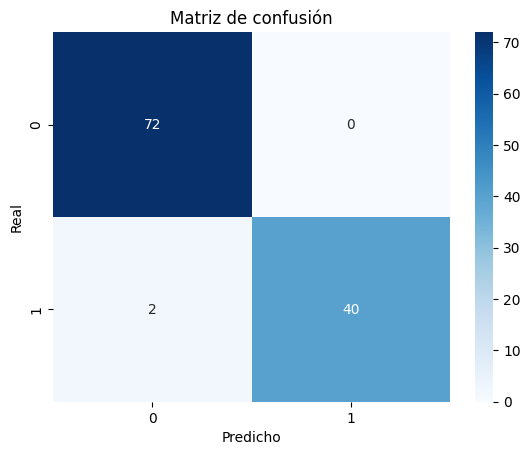

In [11]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred_opt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho"); plt.ylabel("Real"); plt.title("Matriz de confusión")
plt.show()

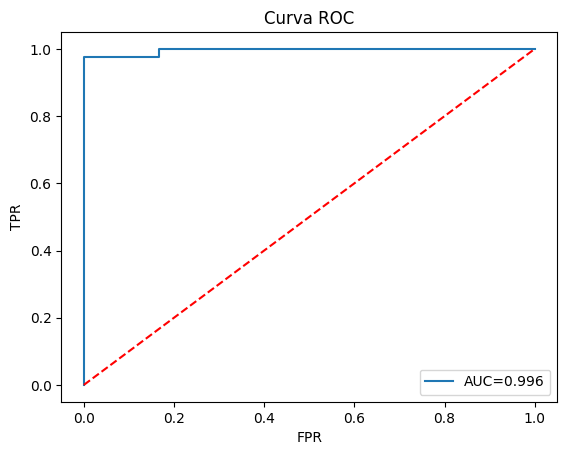

In [12]:
# 8. Curva ROC
y_proba = grid.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("Curva ROC"); plt.legend()
plt.show()